# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Dzy
2. Syn
3. Nand

# Latar Belakang
Dataset "Cryotherapy" berisi informasi tentang hasil pengobatan kutil dari 90 pasien menggunakan cryotherapy. Dalam hal ini, kami menggunakan salah satu metode ensemble learning yaitu Random Forest yang dapat mengurangi overfitting dengan menggunakan banyak
pohon keputusan. Penerapan metode ini pada dataset tersebut
melibatkan pembagian dataset, pelatihan model, dan pengukuran kinerja untuk mengklasifikasikan cryotherapy berdasarkan informasi yang ada, dengan mempertimbangkan aspek medis dan
biologis untuk interpretasi yang lebih baik. Kami memilih metode Random Forest karena metode Random Forest efektif untuk dataset ini.

# PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cryo = pd.read_csv("Cryotherapy.csv")
cryo

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0
...,...,...,...,...,...,...,...
85,2,34,12.00,3,3,95,0
86,2,20,3.50,6,1,75,1
87,2,35,8.25,8,3,100,0
88,1,24,10.75,10,1,20,1


In [ ]:
cryo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


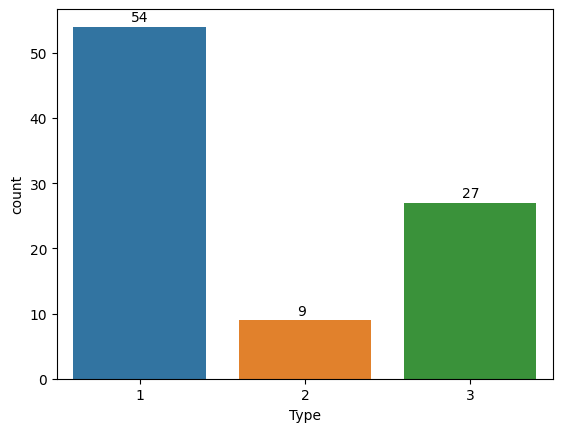

In [ ]:
plot = sns.countplot(x='Type', data=cryo)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.8))

(7.5, -0.5)

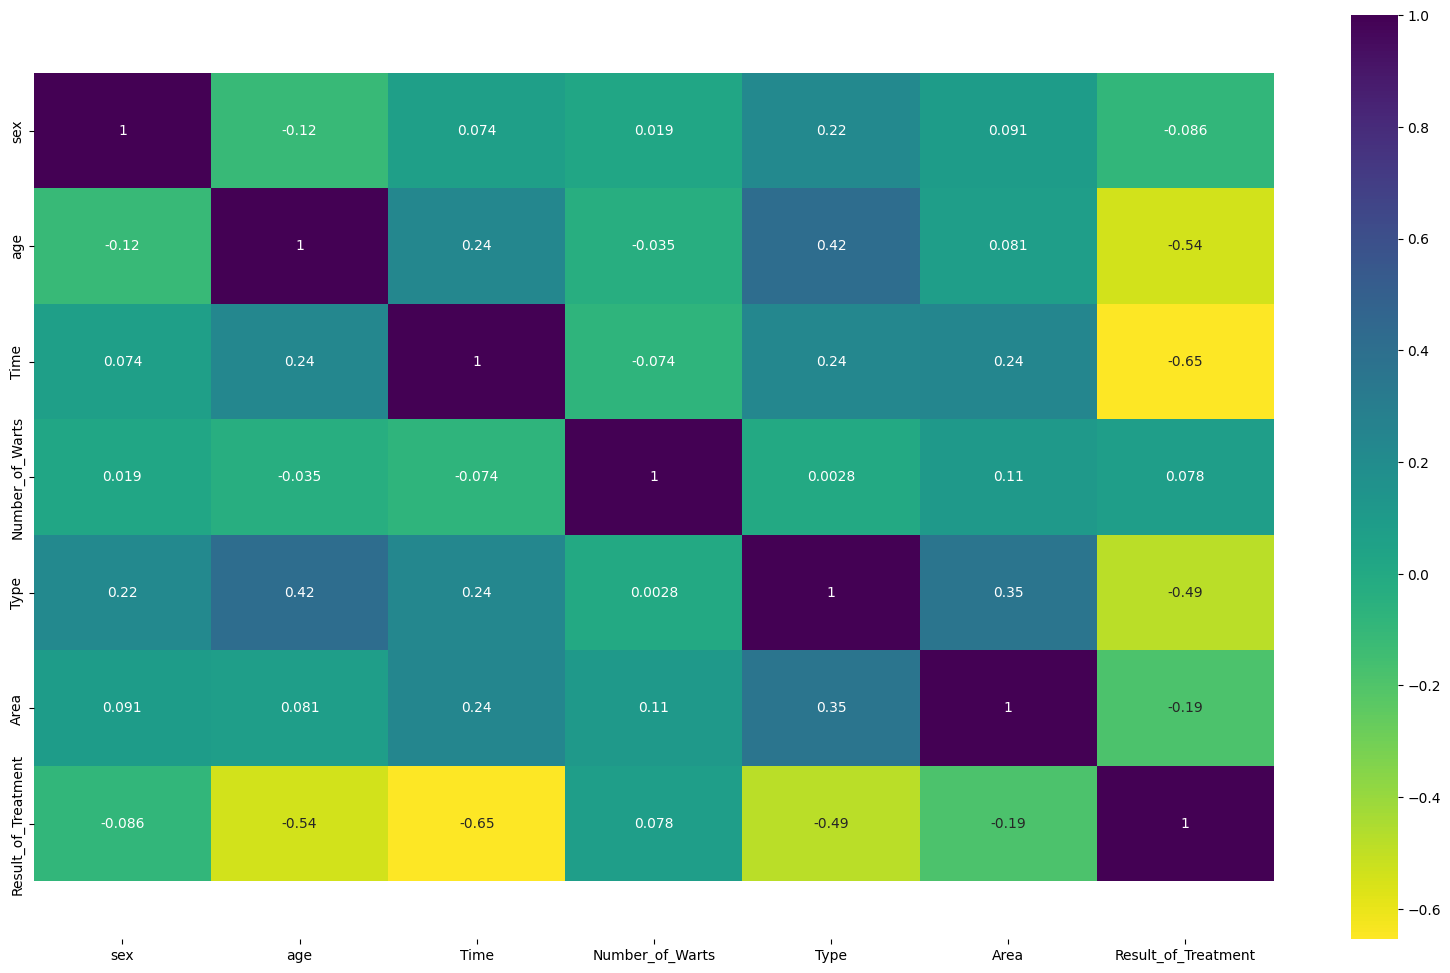

In [ ]:
corr_matrix=cryo.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(corr_matrix, annot = True, cmap="viridis_r")
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

In [ ]:
#memisahkan kolom Type
y=cryo['Type']
X=cryo.drop('Type',axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
X

,sex,age,Time,Number_of_Warts,Area,Result_of_Treatment
0,0.0,0.384615,1.000000,0.363636,0.128686,0.0
1,0.0,0.269231,0.574468,0.363636,0.123324,1.0
2,0.0,0.673077,0.659574,0.000000,0.171582,0.0
3,0.0,0.326923,0.978723,0.545455,1.000000,0.0
4,0.0,1.000000,0.765957,0.000000,0.050938,0.0
...,...,...,...,...,...,...
85,1.0,0.365385,1.000000,0.181818,0.121984,0.0
86,1.0,0.096154,0.276596,0.454545,0.095174,1.0
87,1.0,0.384615,0.680851,0.636364,0.128686,0.0
88,0.0,0.173077,0.893617,0.818182,0.021448,1.0


In [ ]:
#Melakukan upsampling dengan SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

minority_class_samples = y_train.value_counts().min()

k_neighbors = min(5, minority_class_samples - 1)

smote = SMOTE(k_neighbors=k_neighbors, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

cryo = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="Type")], axis=1)

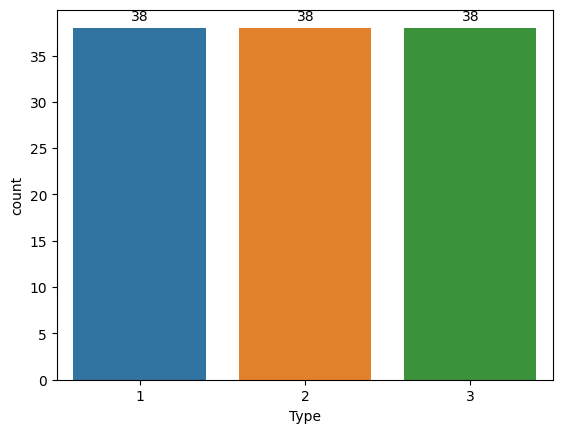

In [ ]:
plot = sns.countplot(x='Type', data=cryo)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.8))

# Baseline Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model = RandomForestClassifier(n_estimators = 100, criterion='gini',
                               min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred))

Accuracy: 0.8888888888888888
Classification report :
               precision    recall  f1-score   support

           1       0.88      0.94      0.91        16
           2       1.00      1.00      1.00         3
           3       0.86      0.75      0.80         8

    accuracy                           0.89        27
   macro avg       0.91      0.90      0.90        27
weighted avg       0.89      0.89      0.89        27



# Train Model

In [ ]:
model4 = RandomForestClassifier(n_estimators = 100, max_depth=4, random_state=42)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred4))

Accuracy: 0.7407407407407407
Classification report :
               precision    recall  f1-score   support

           1       0.74      0.88      0.80        16
           2       1.00      0.33      0.50         3
           3       0.71      0.62      0.67         8

    accuracy                           0.74        27
   macro avg       0.82      0.61      0.66        27
weighted avg       0.76      0.74      0.73        27



In [ ]:
model1 = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state=42)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred1))

Accuracy: 0.8518518518518519
Classification report :
               precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       1.00      1.00      1.00         3
           3       0.75      0.75      0.75         8

    accuracy                           0.85        27
   macro avg       0.88      0.88      0.88        27
weighted avg       0.85      0.85      0.85        27



In [ ]:
model5 = RandomForestClassifier(n_estimators = 100, max_depth=6, random_state=42)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred5))

Accuracy: 0.8888888888888888
Classification report :
               precision    recall  f1-score   support

           1       0.88      0.94      0.91        16
           2       1.00      1.00      1.00         3
           3       0.86      0.75      0.80         8

    accuracy                           0.89        27
   macro avg       0.91      0.90      0.90        27
weighted avg       0.89      0.89      0.89        27



In [ ]:
model6 = RandomForestClassifier(n_estimators = 200, max_depth=1,
                                bootstrap=False, max_features="log2",
                                random_state=42)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
accuracy = accuracy_score(y_test, y_pred6)
print("Accuracy:", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred6))

Accuracy: 0.6666666666666666
Classification report :
               precision    recall  f1-score   support

           1       0.68      0.81      0.74        16
           2       0.00      0.00      0.00         3
           3       0.62      0.62      0.62         8

    accuracy                           0.67        27
   macro avg       0.44      0.48      0.46        27
weighted avg       0.59      0.67      0.63        27



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model2 = RandomForestClassifier(n_estimators = 200, max_depth=2,
                                bootstrap=False, max_features="log2",
                                random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred2))

Accuracy: 0.7037037037037037
Classification report :
               precision    recall  f1-score   support

           1       0.70      0.88      0.78        16
           2       0.00      0.00      0.00         3
           3       0.71      0.62      0.67         8

    accuracy                           0.70        27
   macro avg       0.47      0.50      0.48        27
weighted avg       0.63      0.70      0.66        27



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model7 = RandomForestClassifier(n_estimators = 200, max_depth=3,
                                bootstrap=False, max_features="log2",
                                random_state=42)
model7.fit(X_train, y_train)
y_pred7 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred7)
print("Accuracy:", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred7))

Accuracy: 0.7037037037037037
Classification report :
               precision    recall  f1-score   support

           1       0.70      0.88      0.78        16
           2       0.00      0.00      0.00         3
           3       0.71      0.62      0.67         8

    accuracy                           0.70        27
   macro avg       0.47      0.50      0.48        27
weighted avg       0.63      0.70      0.66        27



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model3 = RandomForestClassifier(n_estimators = 10, max_depth=10,
                                max_features="log2",
                                random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred3))

Accuracy: 0.7777777777777778
Classification report :
               precision    recall  f1-score   support

           1       0.86      0.75      0.80        16
           2       1.00      1.00      1.00         3
           3       0.60      0.75      0.67         8

    accuracy                           0.78        27
   macro avg       0.82      0.83      0.82        27
weighted avg       0.80      0.78      0.78        27



In [ ]:
model8 = RandomForestClassifier(n_estimators = 10, max_depth=11,
                                max_features="log2",
                                random_state=42)
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)
accuracy = accuracy_score(y_test, y_pred8)
print("Accuracy:", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred8))

Accuracy: 0.7777777777777778
Classification report :
               precision    recall  f1-score   support

           1       0.86      0.75      0.80        16
           2       1.00      1.00      1.00         3
           3       0.60      0.75      0.67         8

    accuracy                           0.78        27
   macro avg       0.82      0.83      0.82        27
weighted avg       0.80      0.78      0.78        27



In [ ]:
model9 = RandomForestClassifier(n_estimators = 10, max_depth=12,
                                max_features="log2",
                                random_state=42)
model9.fit(X_train, y_train)
y_pred9 = model9.predict(X_test)
accuracy = accuracy_score(y_test, y_pred9)
print("Accuracy:", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred9))

Accuracy: 0.7777777777777778
Classification report :
               precision    recall  f1-score   support

           1       0.86      0.75      0.80        16
           2       1.00      1.00      1.00         3
           3       0.60      0.75      0.67         8

    accuracy                           0.78        27
   macro avg       0.82      0.83      0.82        27
weighted avg       0.80      0.78      0.78        27



# Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

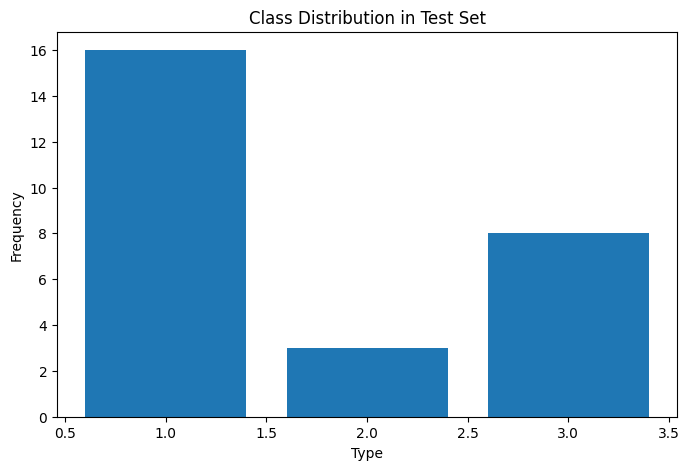

In [ ]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
plt.bar(np.unique(y_test, return_counts=True)[0], np.unique(y_test, return_counts=True)[1])
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Class Distribution in Test Set')
plt.show()

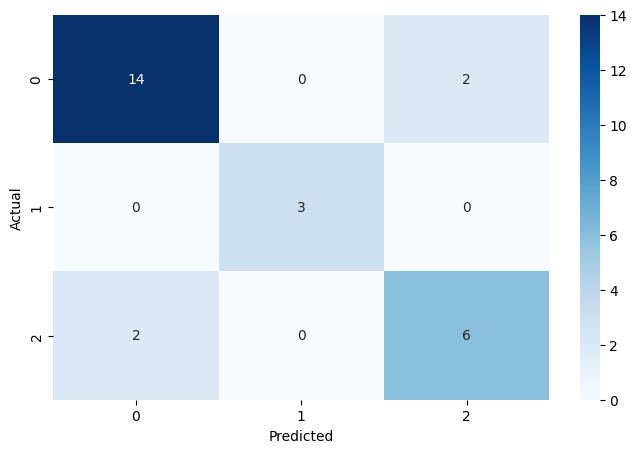

In [ ]:
eval = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 5))
sns.heatmap(eval, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
final_predict_df=pd.DataFrame({'Index':X_test.index,'Predicted Type':y_pred,'Actual Type':y_test})
final_predict_df

,Index,Predicted Type,Actual Type
40,40,1,1
22,22,1,1
55,55,3,3
70,70,1,1
0,0,3,1
26,26,1,1
39,39,3,3
65,65,2,2
10,10,1,1
44,44,1,1


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Membuat objek RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Menerapkan 5 cross-validation dan mengukur akurasi
cross_val_scores = cross_val_score(rf_classifier, X_test, y_test, cv=5, scoring='accuracy')

# Mencetak hasil cross-validation
print("Hasil 5 Cross-Validation:")
print(cross_val_scores)

# Menampilkan rata-rata dan deviasi standar dari hasil cross-validation
print(f"Rata-rata Akurasi: {np.mean(cross_val_scores)}")
print(f"Deviasi Standar Akurasi: {np.std(cross_val_scores)}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Hasil 5 Cross-Validation:
[0.66666667 0.66666667 0.8        0.6        0.8       ]
Rata-rata Akurasi: 0.7066666666666667
Deviasi Standar Akurasi: 0.08000000000000003


# Ringkasan Metode
Kami menggunakan metode Random Forest dan membuat 3 model dengan spesifikasi tiap model sebagai berikut :


##### Model 1
model pertama kami membuat 100 pohon, dengan maksimal kedalaman pada setiap pohonnya 5 dan menggunakan bootstrap, yang maksimal fitunya adalah (sqrt).
##### Model 2
model kedua kammi membuat 200 pohon, dengan maksimal kedalaman pada setiap pohonnya 2, tidak menggunakan bootstrap, maksimal fiturnya adalah log2 dari total fitur yang berjumlah 6.
##### Model 3
model ketiga kami membuat 10 pohon, dengan maksimal kedalaman pada setiap pohonnya 10, menggunakan bootstrap, maksimal fiturnya adalah log2 dari total fitur yang berjumlah 6.







# Hasil dan Analisis
1.   Model 1
menghasilkan akurasi 0.8518518518518519
2.   Model 2
menghasilkan akurasi 0.7037037037037037
3. Model 3
menghasilkan akurasi 0.7777777777777778

# Kesimpulan
Model 1 memiliki akurasi yang paling tinggi karena n_estimators dan max_depth mencapai titik semu. Jika
kedua nilai tersebut berada di bawah titik puncak maka akurasi akan berkurang. Jika model telah mencapai titik puncak atau titik jenuh
sehingga panambahan parameter tidak akan berpengaruh pada akurasi.